<a href="https://colab.research.google.com/github/JaffySherlinA/oasis/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'/content'

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

Exploratory Data Analysis

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.isnull().values.any()
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Visualization

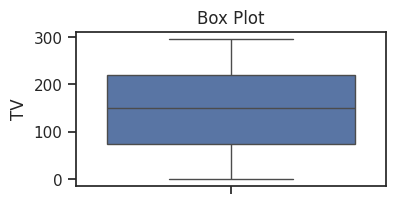

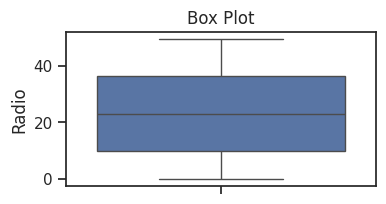

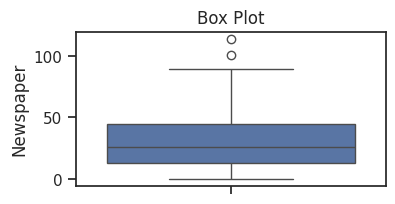

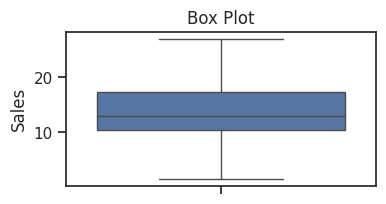

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='TV')
plt.title('Box Plot')
plt.ylabel('TV')
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='Radio')
plt.title('Box Plot')
plt.ylabel('Radio')
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='Newspaper')
plt.title('Box Plot')
plt.ylabel('Newspaper')
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='Sales')
plt.title('Box Plot')
plt.ylabel('Sales')
plt.show()

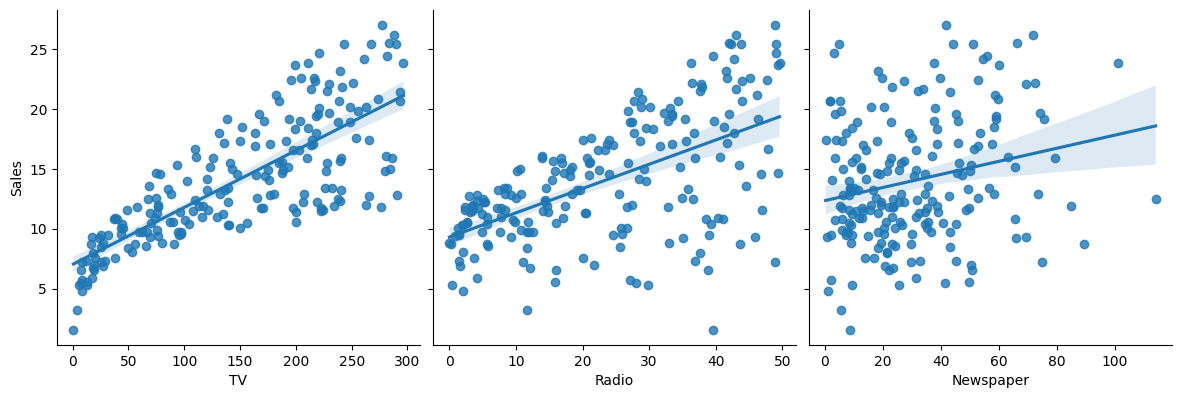

In [ ]:
columns = ["TV", "Radio", "Newspaper"]

# Create a pairplot with regression lines for each combination of variables
sns.pairplot(df, x_vars=columns, y_vars="Sales", kind="reg", height=4)

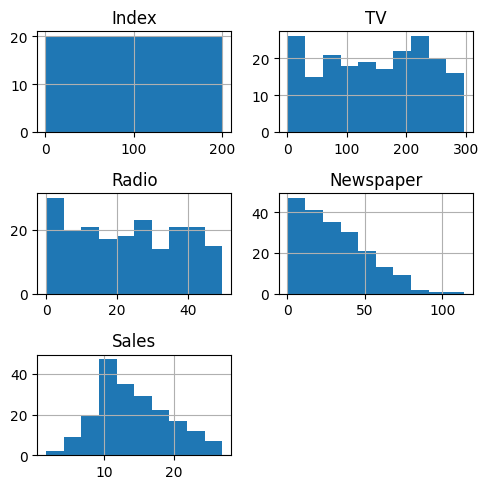

In [ ]:
df.hist(bins=10, figsize=(5, 5))

# Set labels and titles
plt.tight_layout()
plt.show()

<ipython-input-34-83c2dd900cf7>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='TV', palette='plasma')
<ipython-input-34-83c2dd900cf7>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Radio', palette='plasma')
<ipython-input-34-83c2dd900cf7>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Newspaper', palette='plasma')


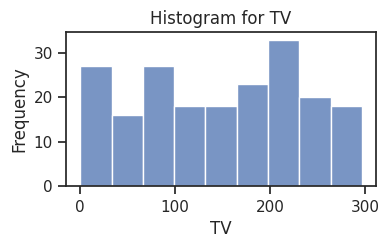

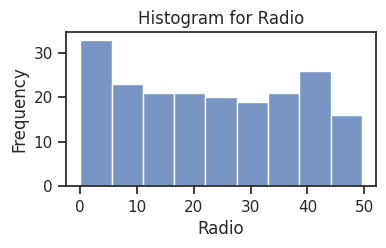

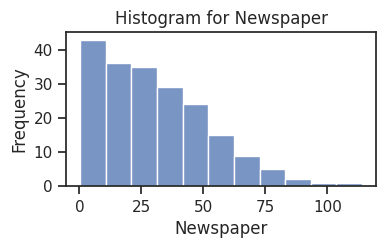

In [ ]:
plt.figure(figsize=(4,2))
sns.histplot(data=df, x='TV', palette='plasma')
plt.title('Histogram for TV')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.figure(figsize=(4,2))
sns.histplot(data=df, x='Radio', palette='plasma')
plt.title('Histogram for Radio')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.figure(figsize=(4,2))
sns.histplot(data=df, x='Newspaper', palette='plasma')
plt.title('Histogram for Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.show()

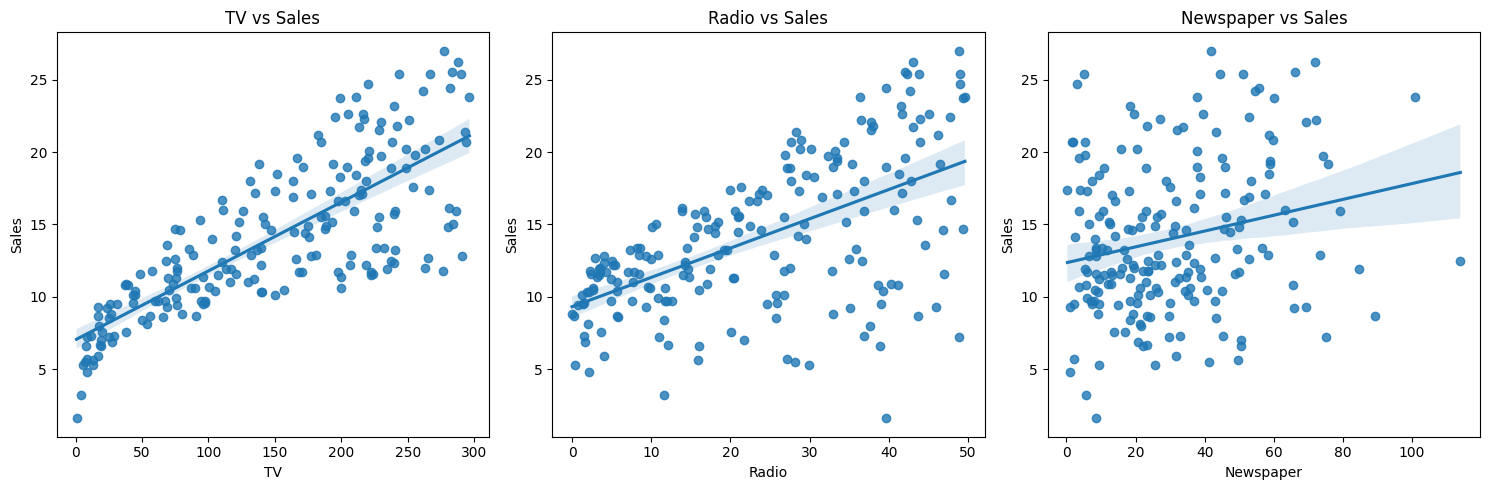

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the regression line for TV vs Sales
sns.regplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

# Plot the regression line for Radio vs Sales
sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

# Plot the regression line for Newspaper vs Sales
sns.regplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

# Adjust layout
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sales')

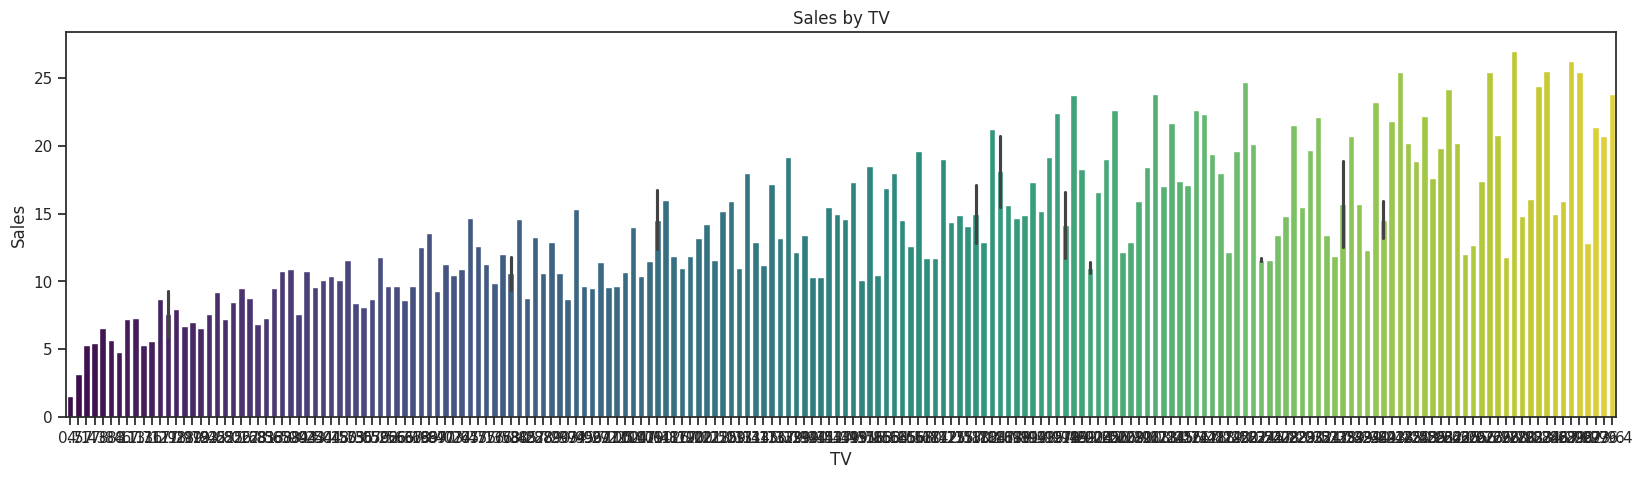

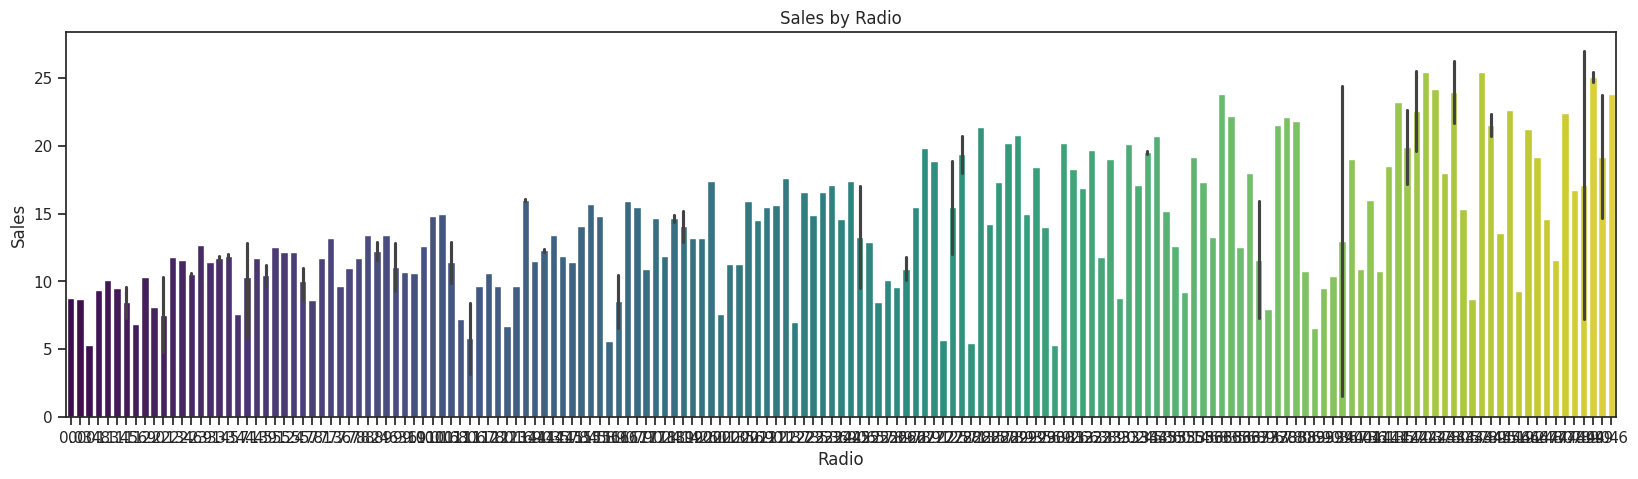

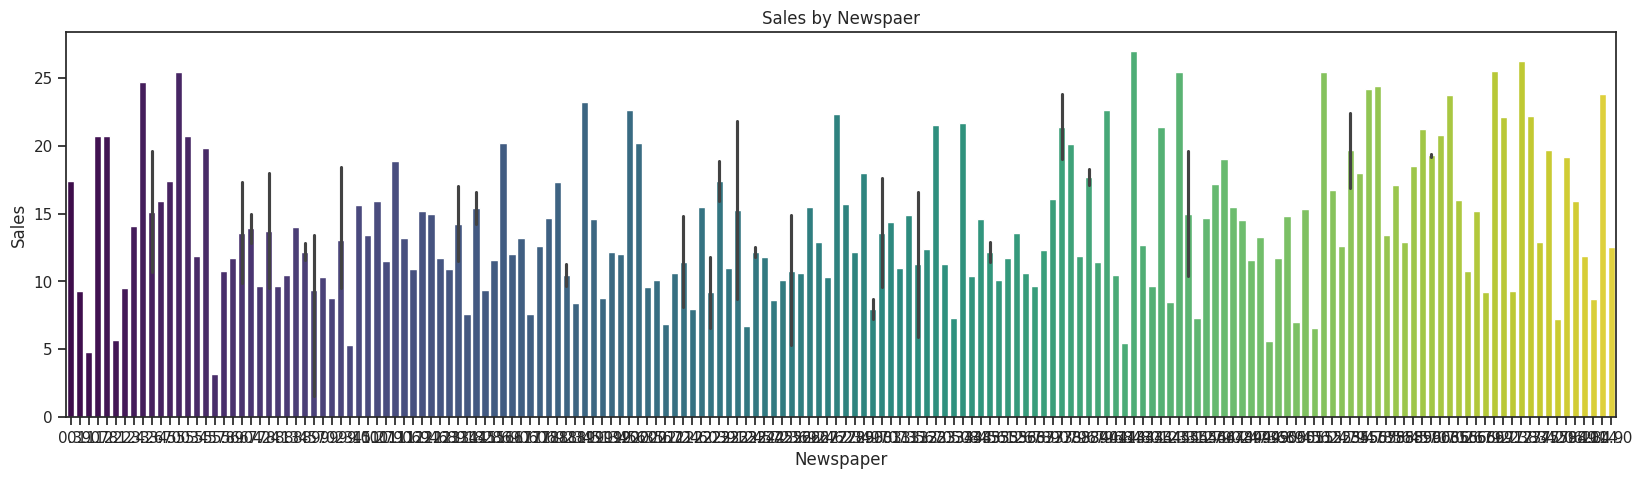

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='TV', y='Sales', data=df, palette='viridis')
plt.title('Sales by TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.figure(figsize=(20,5))
sns.barplot(x='Radio', y='Sales', data=df, palette='viridis')
plt.title('Sales by Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.figure(figsize=(20,5))
sns.barplot(x='Newspaper', y='Sales', data=df, palette='viridis')
plt.title('Sales by Newspaer')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

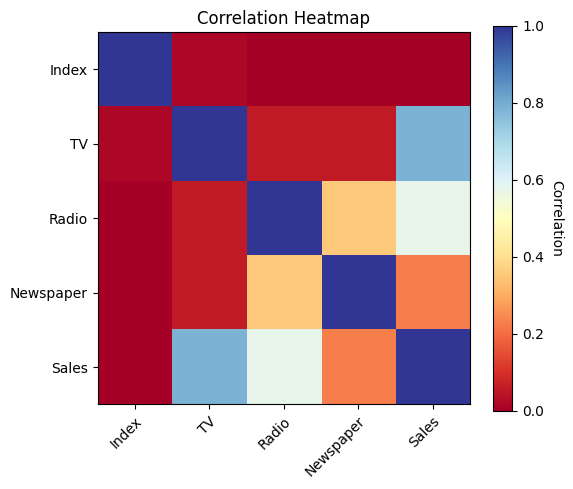

In [ ]:
import matplotlib.pyplot as plt

# Compute the correlation matrix
corrmat = df.corr()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 5))

# Create a heatmap of the correlation matrix
im = ax.imshow(corrmat, cmap="RdYlBu", vmin=0, vmax=1)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")

# Set labels and title
ax.set_xticks(range(len(corrmat.columns)))
ax.set_yticks(range(len(corrmat.columns)))
ax.set_xticklabels(corrmat.columns)
ax.set_yticklabels(corrmat.columns)
plt.title('Correlation Heatmap')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Show plot
plt.show()


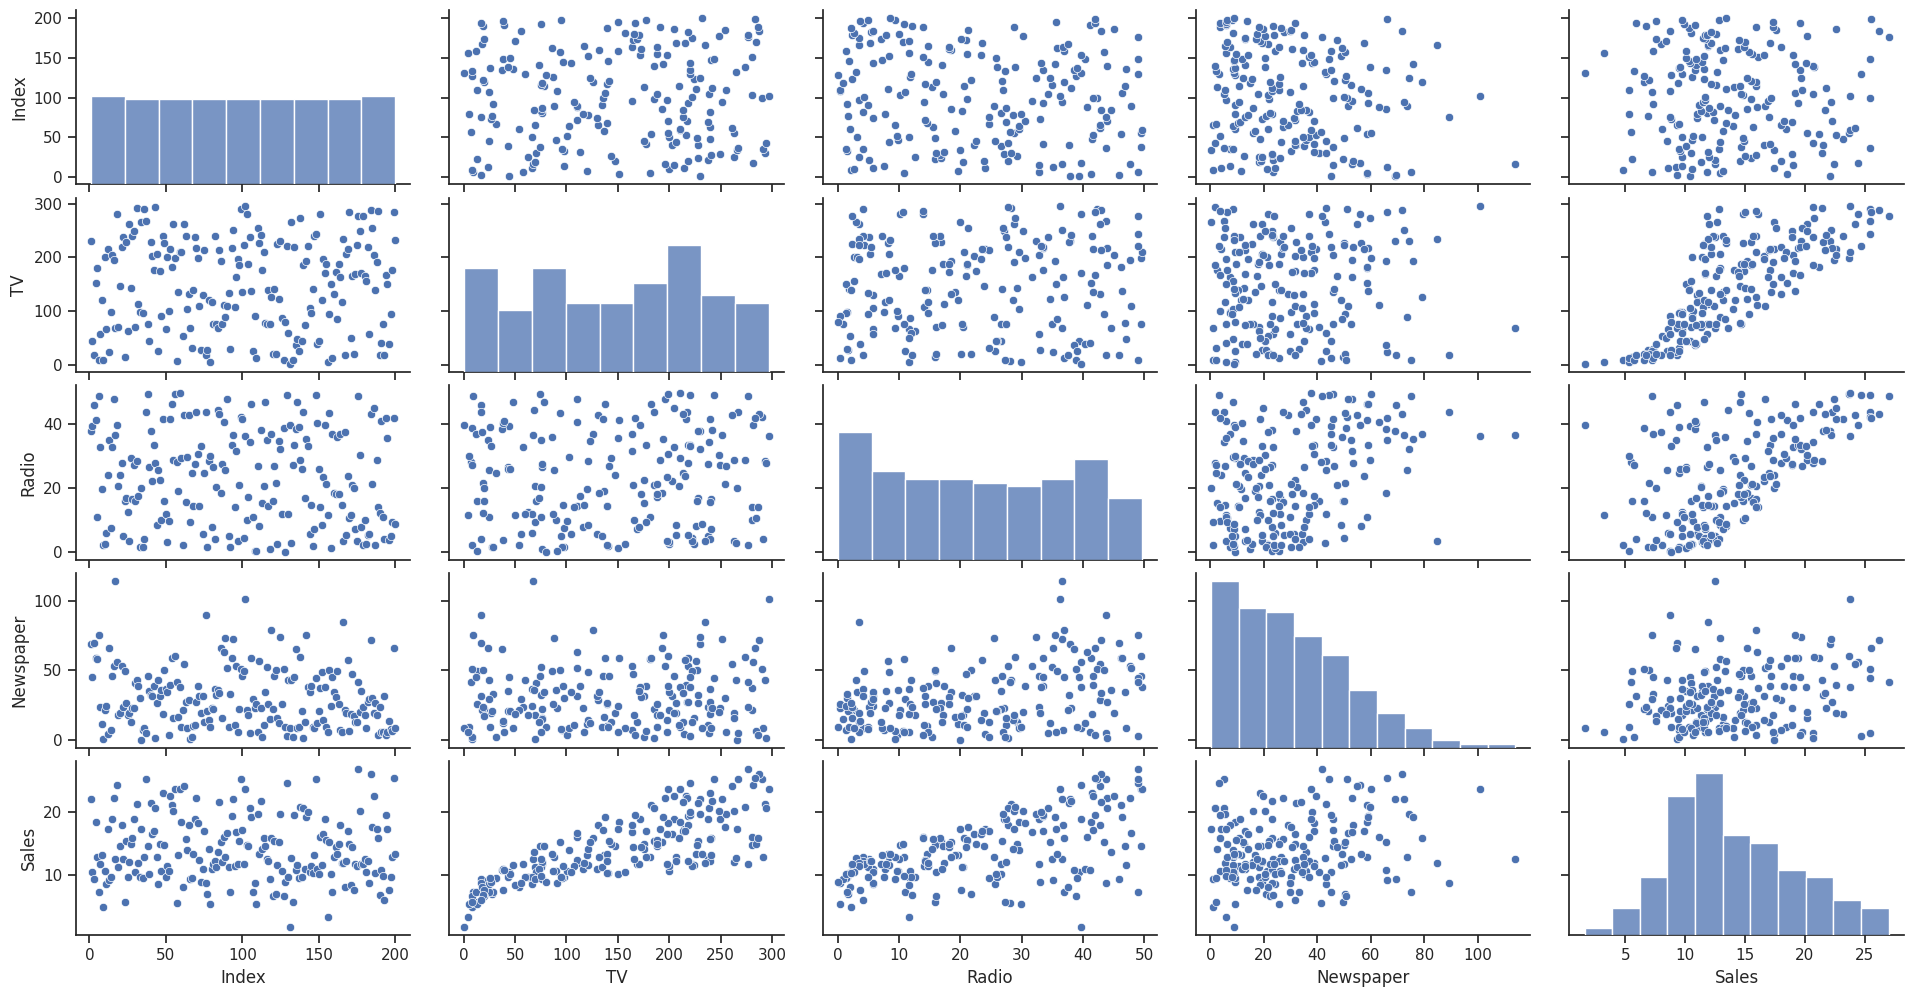

In [ ]:
def plotScatterMatrix(df, graphWidth, graphHeight):
    sns.set(style="ticks")
    sns.pairplot(df)
    plt.gcf().set_size_inches(graphWidth, graphHeight)
    plt.show()
plotScatterMatrix(df, 20, 10)

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df["Sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

# Fit the linear regression model
lin_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Print the coefficients of the model
print("Intercept:", lin_model.params[0])
print("TV Coefficient:", lin_model.params[1])
print("Radio Coefficient:", lin_model.params[2])
print("Newspaper Coefficient:", lin_model.params[3])


Intercept: 2.951819035817665
TV Coefficient: -0.0009869574944980017
Radio Coefficient: 0.04616409321209468
Newspaper Coefficient: 0.18808776088491827


In [ ]:
results = []
names = []
# Define a list of models to evaluate

models = [('LinearRegression', LinearRegression())]

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.703648
